In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from torchvision import models
from torch.utils.data import DataLoader

In [5]:

# تحميل نموذج مدرّب مسبقًا (ResNet18)
model = models.resnet18(pretrained=True)

# تعديل الطبقة الأخيرة لتتناسب مع عدد الفئات المطلوبة (مثلاً 2 فئة)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# إعداد بيانات التدريب والتحويلات
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# تحميل مجموعة بيانات CIFAR-10 وتصفية فئتين فقط (القطط والكلاب)
class_indices = [3, 5]  # 3: Cats, 5: Dogs
full_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
filtered_data = [(img, label) for img, label in full_dataset if label in class_indices]


c:\Users\pinwd\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pinwd\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Files already downloaded and verified


In [6]:
# إعادة تعيين التسميات إلى 0 و 1 فقط
for i in range(len(filtered_data)):
    filtered_data[i] = (filtered_data[i][0], class_indices.index(filtered_data[i][1]))

# إنشاء DataLoader جديد بالمجموعة المصفاة
trainloader = DataLoader(filtered_data, batch_size=32, shuffle=True)

# تهيئة النموذج والمُحسّن
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
# Fine-Tuning
num_epochs = 5
loss_history = []
y_true, y_pred = [], []
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
    epoch_loss = running_loss / len(trainloader)
    loss_history.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss}')


Epoch 1, Loss: 0.461036998004959
Epoch 2, Loss: 0.3585166655266628
Epoch 3, Loss: 0.2968079475358652
Epoch 4, Loss: 0.25003715737844806
Epoch 5, Loss: 0.21577377217455793


Final Accuracy: 86.19%


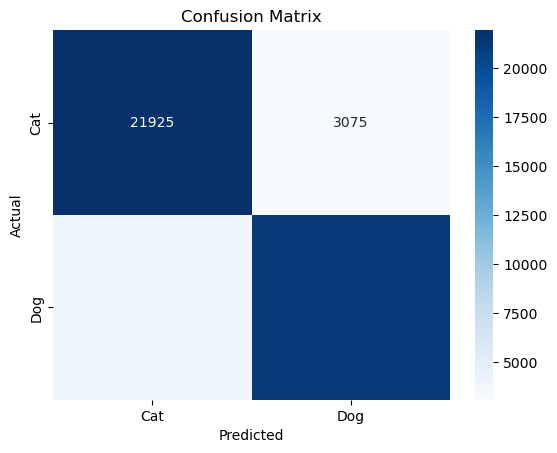

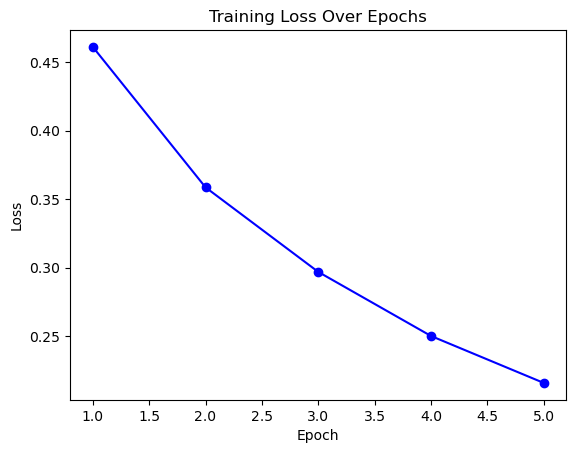

Fine-Tuning Complete!


In [8]:
# حساب الدقة
accuracy = accuracy_score(y_true, y_pred)
print(f'Final Accuracy: {accuracy * 100:.2f}%')

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization of Loss
plt.plot(range(1, num_epochs+1), loss_history, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

print("Fine-Tuning Complete!")
